1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Eigenvalues:  [ 2.92670160e+01 -2.40049045e-16  2.14603578e+00]
Eigenvectors:  [[-0.12102538 -0.81649658  0.56452298]
 [-0.57037124 -0.40824829 -0.71274819]
 [-0.812422    0.40824829  0.41629776]]
Eigenvalues(SVD):  [2.92684159e+01 2.14609486e+00 1.50836484e-31]
Eigenvectors(SVD):  [[-0.12103136  0.56452169 -0.81649658]
 [-0.57036368 -0.71275424 -0.40824829]
 [-0.81242641  0.41628915  0.40824829]]
Lambda:  [[ 2.92670160e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.40049045e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.14603578e+00]]
data.trace():  31.413051728385632
Lambda.trace():  31.41305172838566
Percentage:  0.9316833080792206


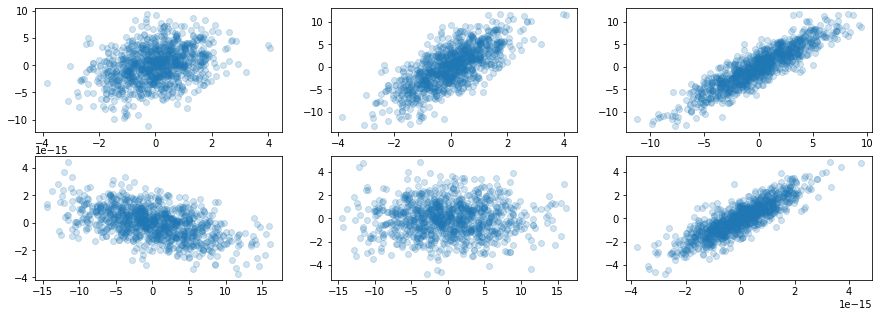

In [1]:
import numpy as np
from scipy import linalg as la #import linear algebra
from matplotlib import pyplot as plt

N = 1000
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3, N)
x3 = 2*x1 + x2
data = np.array([x1,x2,x3])
cov_matrix = np.cov(data)

#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
l, V = np.linalg.eig(cov_matrix)
print("Eigenvalues: ", l)
print("Eigenvectors: ", V)
U, spectrum, Vt = np.linalg.svd(data)
l_svd = spectrum**2/(N-1)
V_svd = U
print("Eigenvalues(SVD): ", l_svd)
print("Eigenvectors(SVD): ", V_svd)

#PCA
Lambda=np.diag(l)
print ("Lambda: ", Lambda)
print ("data.trace(): ", np.cov(data).trace())
print ("Lambda.trace(): ", Lambda.trace())
print ("Percentage: ", Lambda[0,0]/Lambda.trace())

Pca = np.dot(V.T,data) #take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis.
xx1 = Pca[0,:]
xx2 = Pca[1,:]
xx3 = Pca[2,:]

fig,plots = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
plots[0,0].scatter(x1, x2, alpha=0.2)
plots[1,0].scatter(xx1, xx2, alpha=0.2)

plots[0,1].scatter(x1, x3, alpha=0.2)
plots[1,1].scatter(xx1, xx3, alpha=0.2)

plots[0,2].scatter(x2, x3, alpha=0.2)
plots[1,2].scatter(xx2, xx3, alpha=0.2)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

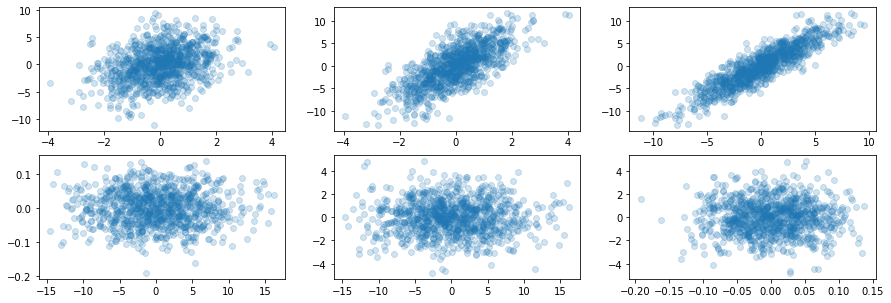

In [2]:
def n():
    return np.random.normal(0, 1/50, N)

noise = n()+n()+n()+n()+n()+n()+n()+n()+n()+n()
x1 = x1 + noise
x2 = x2 + noise
x3 = x3 + noise
data = np.array([x1,x2,x3])
l, V = np.linalg.eig(np.cov(data))

Pca = np.dot(V.T,data)
xx1 = Pca[0,:]
xx2 = Pca[1,:]
xx3 = Pca[2,:]

fig,plots = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
plots[0,0].scatter(x1, x2, alpha=0.2)
plots[1,0].scatter(xx1, xx2, alpha=0.2)

plots[0,1].scatter(x1, x3, alpha=0.2)
plots[1,1].scatter(xx1, xx3, alpha=0.2)

plots[0,2].scatter(x2, x3, alpha=0.2)
plots[1,2].scatter(xx2, xx3, alpha=0.2)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


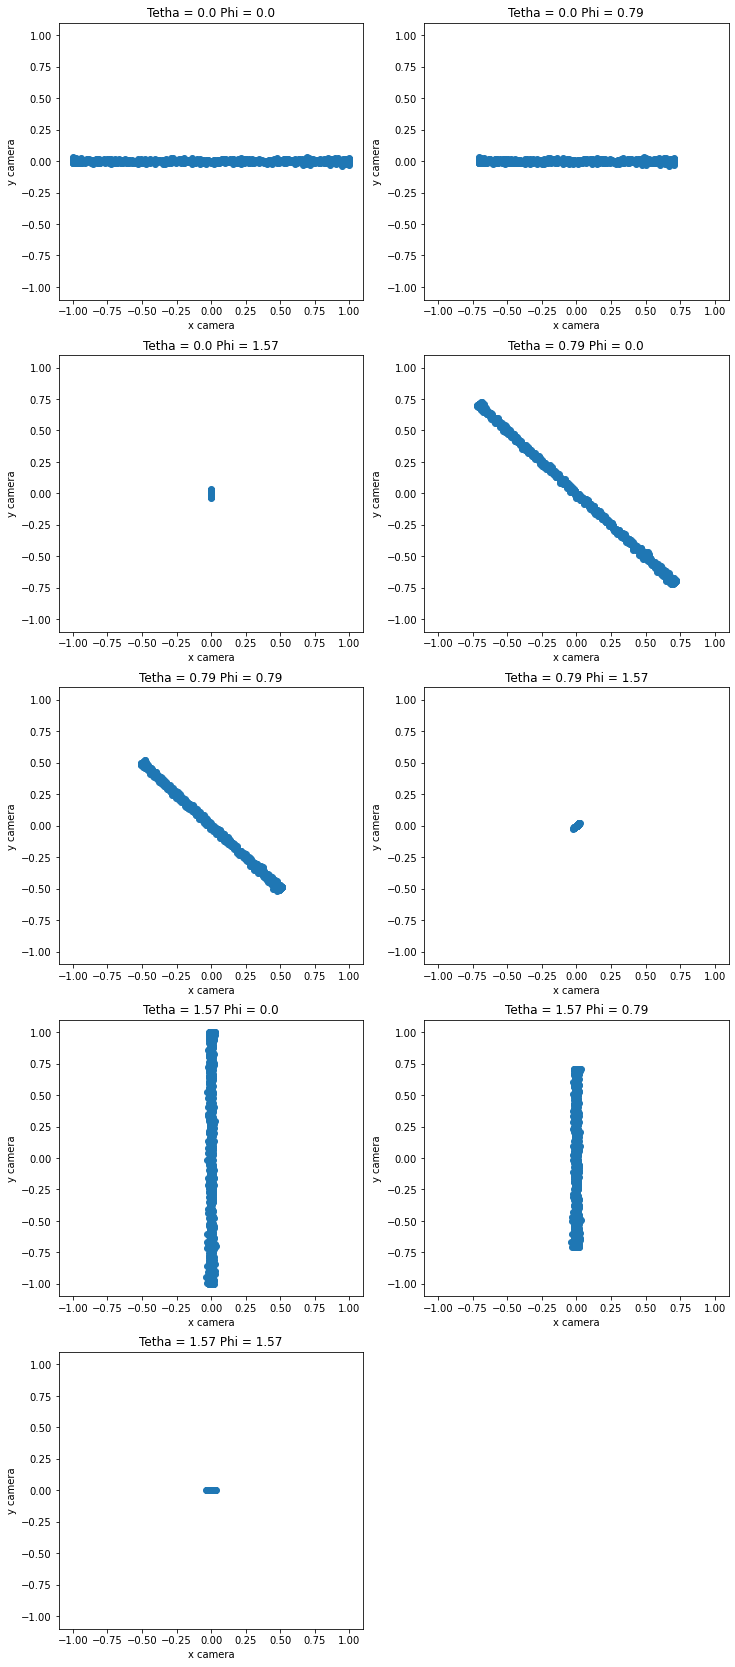

In [5]:
N = 1000 # Total number of samples
t = np.linspace(0,2*np.pi,N)
spring_x = np.sinh(t)
noise_y = np.random.normal(loc=0, scale=0.1, size=N) # Little noise

v = np.array([
    np.sin(2*np.pi*t), # x
    np.random.normal(loc=0.0, scale=0.01, size=(N)), # y
    np.zeros(N) # z
    ])

samples = 3
theta = np.linspace(0,np.pi/2,samples)
phi = np.linspace(0,np.pi/2,samples)
cameras_coord = np.zeros((samples**2,2))
rotated_spring = np.zeros((samples**2,N,3))

i=0
for t in theta:
    for p in phi:
        y_rotation = np.array([[np.cos(p), 0, np.sin(p)], [0, 1, 0], [-np.sin(p), 0, np.cos(p)]])
        z_rotation = np.array([[np.cos(t), np.sin(t), 0], [-np.sin(t), np.cos(t), 0], [0, 0, 1]])

        rot = z_rotation.dot(y_rotation)
            # Apply the rotation to the original data
        rotated_spring[i] = rot.dot(v).T
        cameras_coord[i] = np.array([t, p])
        i += 1
        
cols = 2
rows = np.ceil(samples**2)
plt.figure(figsize = (12,6*rows))
for k in range(1,samples**2+1):
    plt.subplot(rows,cols,k)
    plt.scatter(rotated_spring[k-1,:,0],rotated_spring[k-1,:,1])
    plt.xlabel("x camera")
    plt.ylabel("y camera")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.title("Tetha = " + str(round(cameras_coord[k-1,0],2)) + 
              " Phi = " + str(round(cameras_coord[k-1,1],2)))

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 
import pandas as pd
file_name="magic04_data.data"
data=pd.read_csv(file_name, nrows = 100)
import urllib.request
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names'
with urllib.request.urlopen(url) as data_file:
    #print (data_file.read(300))
    for line in data_file:
        print (line)
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

b'1. Title of Database: MAGIC gamma telescope data 2004\n'
b'\n'
b'2. Sources:\n'
b'\n'
b'   (a) Original owner of the database:\n'
b'\n'
b'       R. K. Bock\n'
b'       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)\n'
b'       http://wwwmagic.mppmu.mpg.de\n'
b'       rkb@mail.cern.ch\n'
b'\n'
b'   (b) Donor:\n'
b'\n'
b'       P. Savicky\n'
b'       Institute of Computer Science, AS of CR\n'
b'       Czech Republic\n'
b'       savicky@cs.cas.cz\n'
b'\n'
b'   (c) Date received: May 2007\n'
b'\n'
b'3. Past Usage:\n'
b'\n'
b'   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,\n'
b'       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,\n'
b'       Vaicilius, A., Wittek W. (2004).\n'
b'       Methods for multidimensional event classification: a case study\n'
b'       using images from a Cherenkov gamma-ray telescope.\n'
b'       Nucl.Instr.Meth. A, 516, pp. 511-528.\n'
b'\n'
b'   (b) P. Savicky, E. Kotrc.\n'
b'       Experimental Stu

In [7]:
print(data)

     fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0    31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1   162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2    23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3    75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4    51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
..       ...       ...     ...     ...     ...       ...      ...       ...   
95   23.4494   16.2843  2.5605  0.4539  0.2655   -8.8017 -15.9867   10.3890   
96   32.0586   15.6976  2.5072  0.3826  0.2037   -2.3114 -17.7455  -11.3244   
97   18.4475   11.7563  2.4074  0.5714  0.4051   -0.0948  -6.5384   11.3970   
98   41.4001   25.6580  3.0414  0.2036  0.1023   39.2650  30.5051  -23.3496   
99   92.5854   11.2825  3.0071  0.3119  0.1923  -68.6490 -48.9200    6.7814   

     fAlpha    fDist category  
0    6.3609  205.26

In [8]:
data = data.drop(columns=['category'])

In [9]:
data.head()
cov_matrix = np.cov(data)

In [10]:
l, V = la.eig(cov_matrix)

In [11]:
Pca = np.dot(V.T, data) 
#in the first column of Pca, we will have the projection of the data onto the first principal component,
#capturing the majority of the variance in the data with a single featrue that is a linear combination of the
#original features

In [12]:
Lambda=np.diag((l))
print ("A.trace():", cov_matrix.trace())
print ("Lambda.trace():", Lambda.trace())

print ("Percentage: ", np.real(Lambda[0,0]/Lambda.trace()))

A.trace(): 506600.4776407695
Lambda.trace(): (506600.4776407698+6.462348535570529e-27j)
Percentage:  0.9248688842980575
